#**Business Case Study : Yulu**


---

<H2>Manan Agrawal

manan.23bcs10206@ms.sst.scaler.com

<H2>Yulu (About) :

---

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution
through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and
convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


<H2>Problem Statement:

---

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands?



<H2>Dataset:

---

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

Used Dataset Link : https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089


## Importing Libraries and Reading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Basic Analysis and Modifications

In [ ]:
df.shape

(10886, 12)

---
- The dataset has 10886 rows and 12 columns.

<br>

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


---
- 'Season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'registered', and 'count' are numerical columns.

<br>

In [ ]:
np.any(df.duplicated())

False

In [ ]:
np.any(df.isna())

False

---
- There are no duplicated values.
- There are no null values.

<H3>Converting DataTypes

In [ ]:
df.datetime=pd.to_datetime(df.datetime)

categories = ['season', 'holiday', 'workingday', 'weather']
for col in categories:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


---

- Converting categorical columns into category.

<br>

<H3>Mapping Data from Number to Variables

In [ ]:
  df.season = df.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

  df.weather = df.weather.replace({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})

  df.holiday = df.holiday.replace({0: 'no', 1: 'yes'})

  df.workingday = df.workingday.replace({0: 'no', 1: 'yes'})


In [ ]:
df['month'] = df['datetime'].dt.month
df.month = df.month.replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',
                             11: 'November',12: 'December'})

---
- Changing the data mapping for easy identification.

<br>

In [ ]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


In [ ]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,no,yes,clear
freq,2734,10575,7412,7192


## Univariate Analysis

<H3>Univariate for Categorical Data

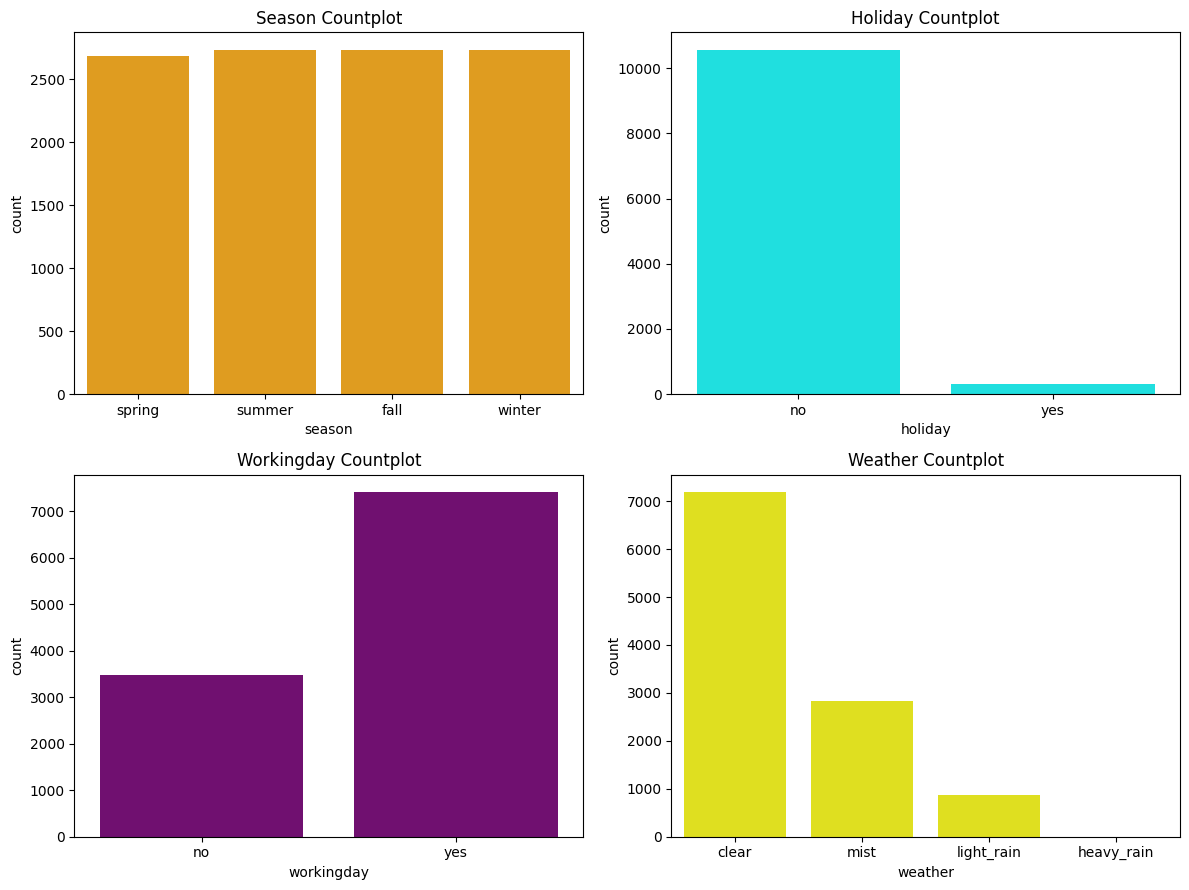

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.countplot(x='season', data=df, ax=axes[0, 0],color='orange')
axes[0, 0].set_title('Season Countplot')

sns.countplot(x='holiday', data=df, ax=axes[0, 1],color='cyan')
axes[0, 1].set_title('Holiday Countplot')

sns.countplot(x='workingday', data=df, ax=axes[1, 0],color='purple')
axes[1, 0].set_title('Workingday Countplot')

sns.countplot(x='weather', data=df, ax=axes[1, 1],color='yellow')
axes[1, 1].set_title('Weather Countplot')
plt.tight_layout()

plt.show()

---

- Almost all the seasons have equal number of users.
- People hesitate to use the vehicle as the weather starts getting rainy.
- There are more number of electric cycles rented on non-holidays.

<br>

In [ ]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [ ]:
df['holiday'].value_counts()

holiday
no     10575
yes      311
Name: count, dtype: int64

In [ ]:
df['workingday'].value_counts()

workingday
yes    7412
no     3474
Name: count, dtype: int64

In [ ]:
df['weather'].value_counts()

weather
clear         7192
mist          2834
light_rain     859
heavy_rain       1
Name: count, dtype: int64

In [ ]:
df['month'].value_counts()

month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

<H3>Univariate for Non-Categorical Data

In [ ]:
non_string_attributes = ['atemp','temp','humidity','windspeed','casual','registered','count']


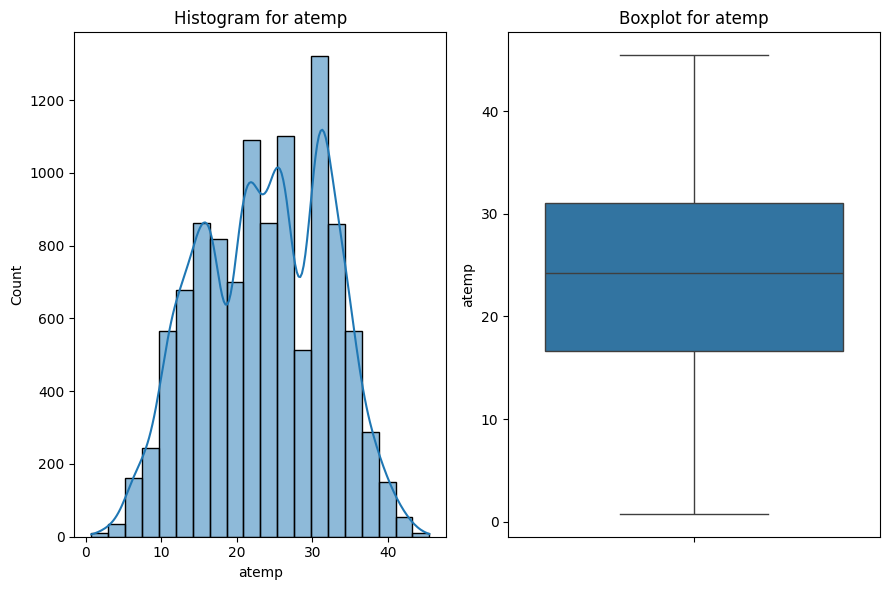

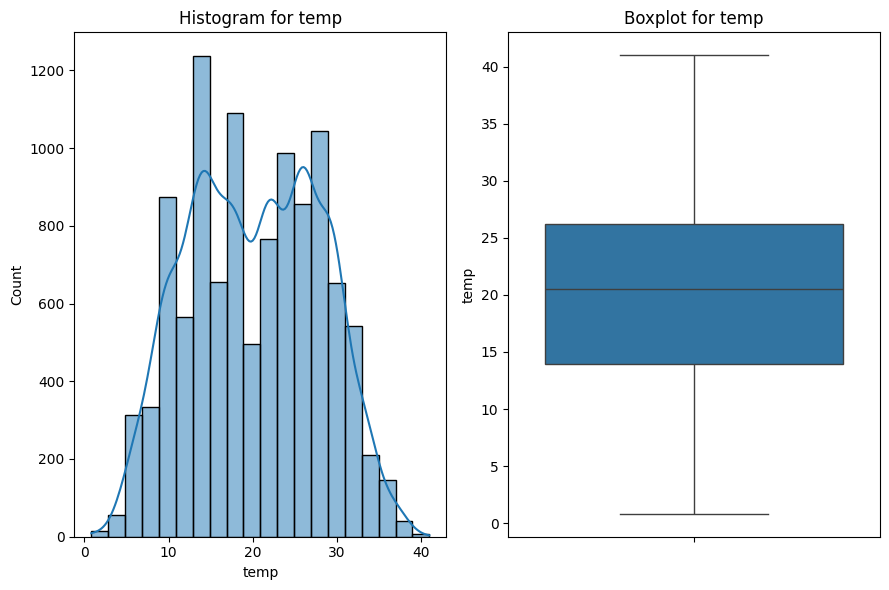

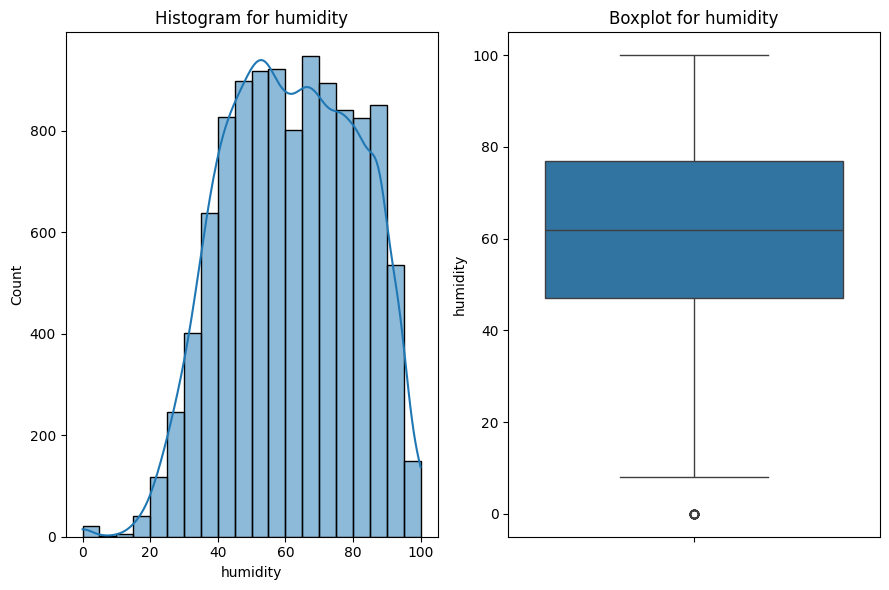

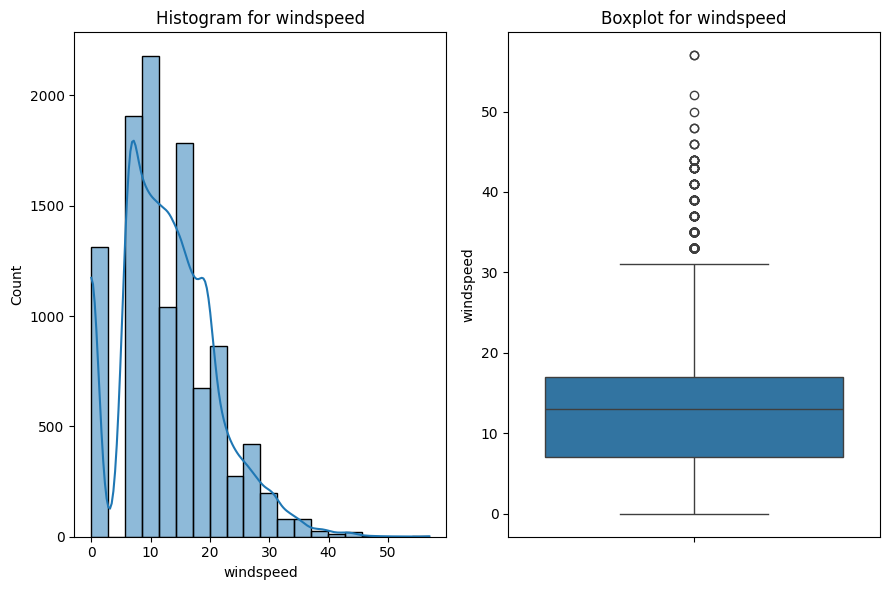

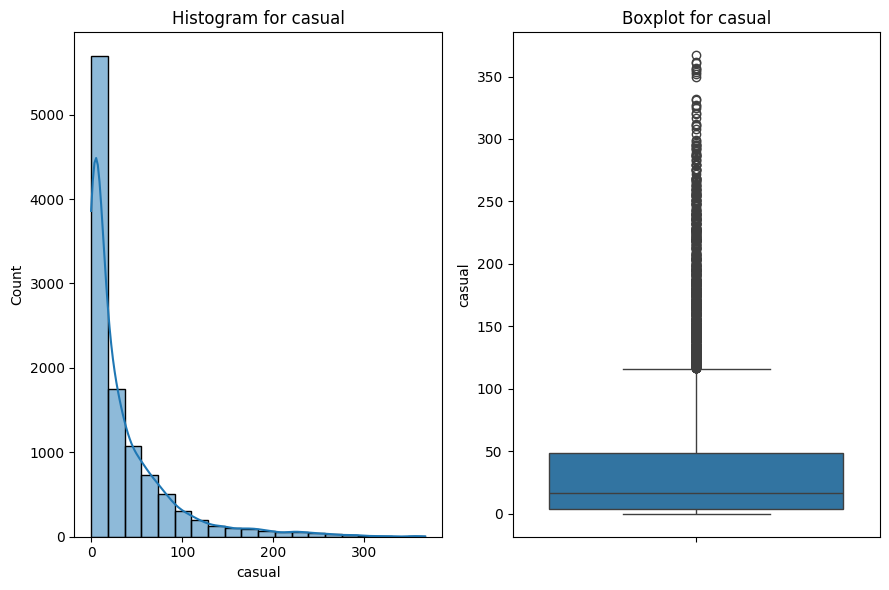

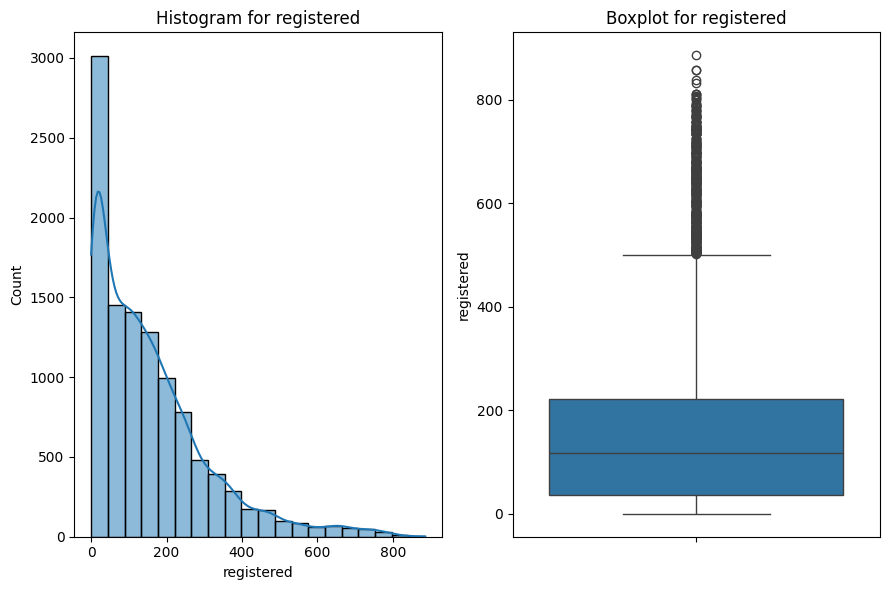

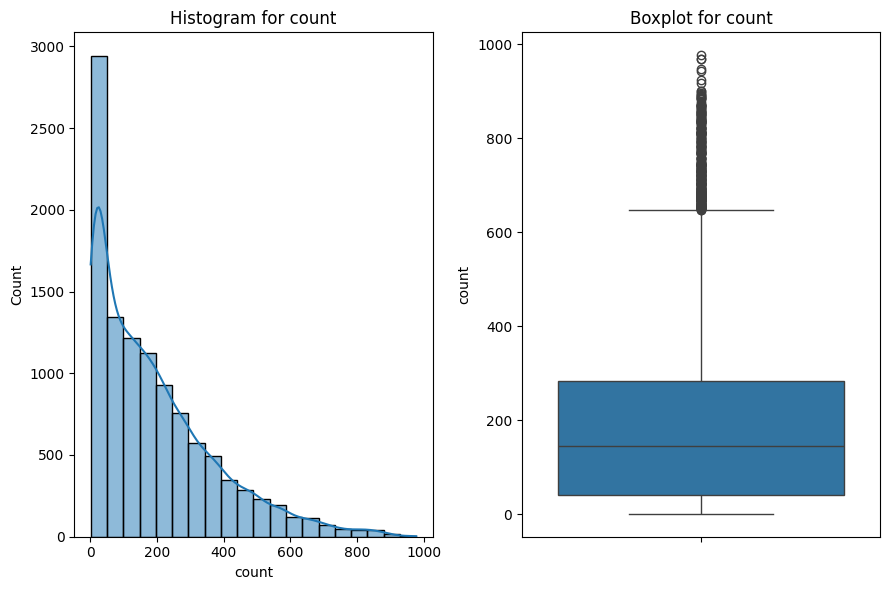

In [ ]:
for col in non_string_attributes:
  fig,axes=plt.subplots(1,2,figsize=(9,6))

  plt.subplot(1,2,1)
  sns.histplot(df[col], bins=20, kde=True)
  plt.title(f'Histogram for {col}')

  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')

  plt.tight_layout()
  plt.show()

---
Atemp:

- atemp has a range of apparent tempratures (0.76,45.455) and mean being 23.

Temp:

- temp also has a good range of tempratures from 0.82 to 41 degrees celsius and mean being 20 degrees celsius.

Humidity:

- humidity ranges from 0 to 100 and shows an average of 61.

WindSpeed:

- windspeed ranges from 0 to 57 with average being around 13. Windspeed also has many outliers.

Casual:

- casual shows range of casual electric cycle rental counts with values from 0 to 367. It contains too many outliers. It has mean around 36.

Registered:

- registered shows range of registered electric cycle rental counts with values from 0 to 886. Registered contains many outliers. It has a mean of around 155.

Count:

- count shows total electric cycle rental counts with values from 1 to 977. The mean is around 191.

<br>

## Bivariate Analysis

<H3> Detecting Outliers

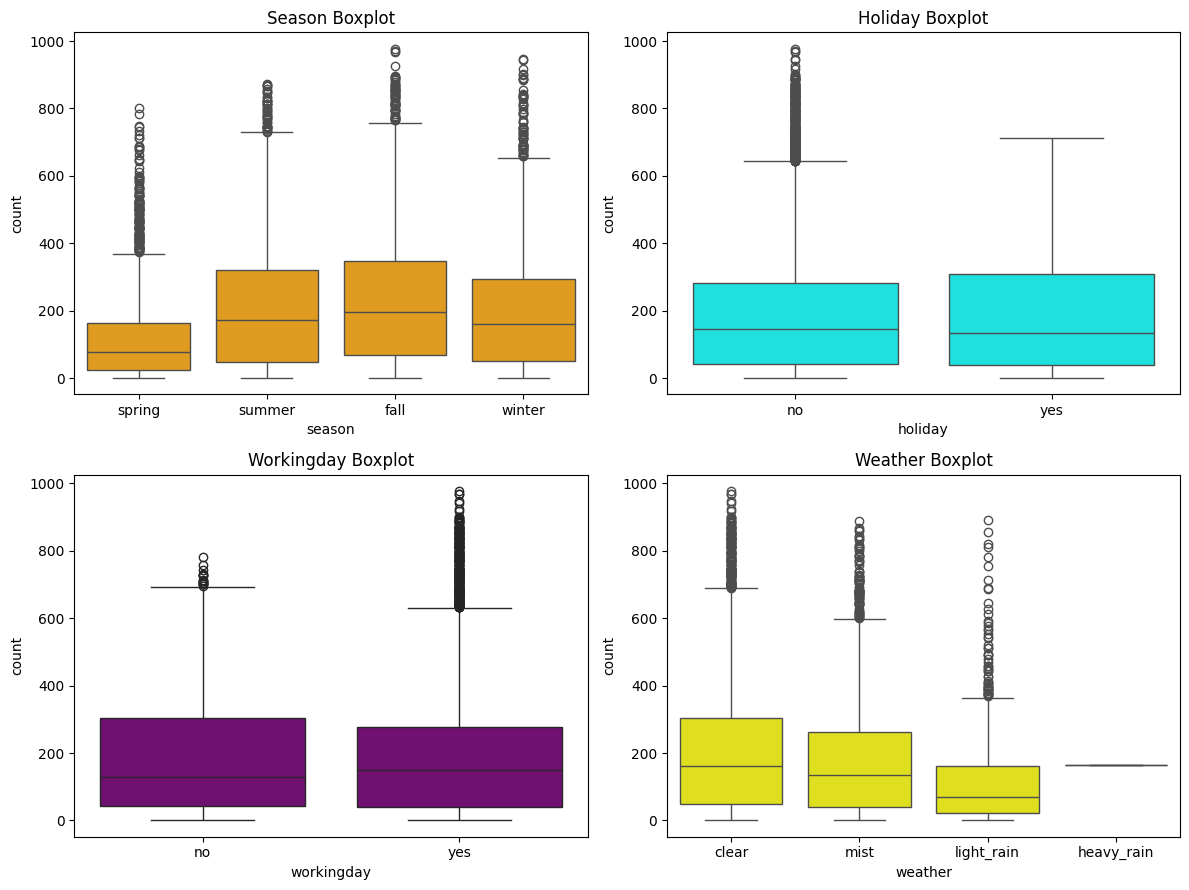

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.boxplot(x='season', y='count', data=df, ax=axes[0, 0],color='orange')
axes[0, 0].set_title('Season Boxplot')

sns.boxplot(x='holiday', y='count', data=df, ax=axes[0, 1],color='cyan')
axes[0, 1].set_title('Holiday Boxplot')

sns.boxplot(x='workingday', y='count', data=df, ax=axes[1, 0],color='purple')
axes[1, 0].set_title('Workingday Boxplot')

sns.boxplot(x='weather', y='count', data=df, ax=axes[1, 1],color='yellow')
axes[1, 1].set_title('Weather Boxplot')
plt.tight_layout()

plt.show()

---

Season:

- Winter and Spring have more outliers compared to the other seasons.

Workingday and Holiday:

- On working day there are more outliers than holiday.

Weather:

- During light rain there is a huge range of outliers.

<br>

<H3>Plotting for Analysis

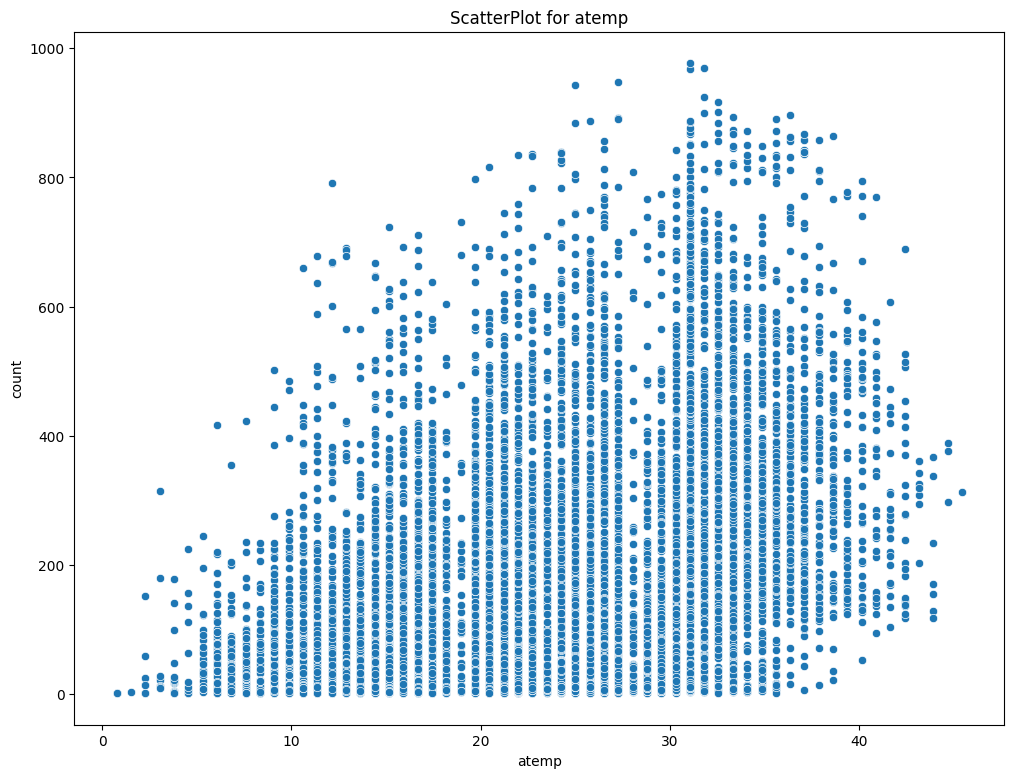

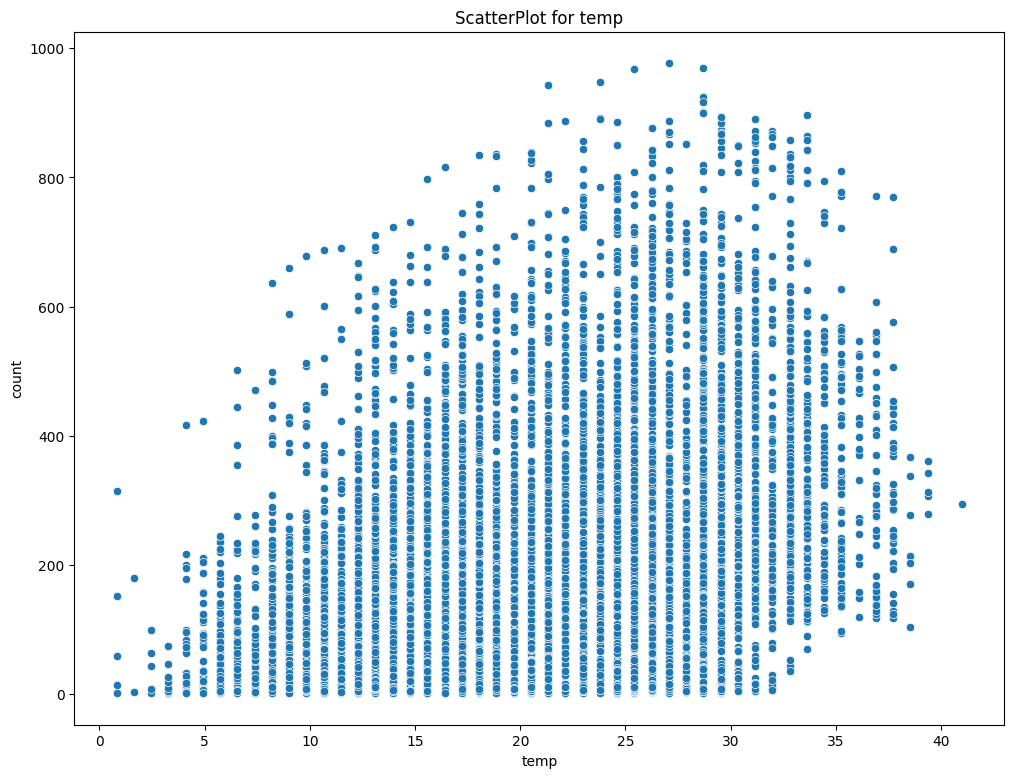

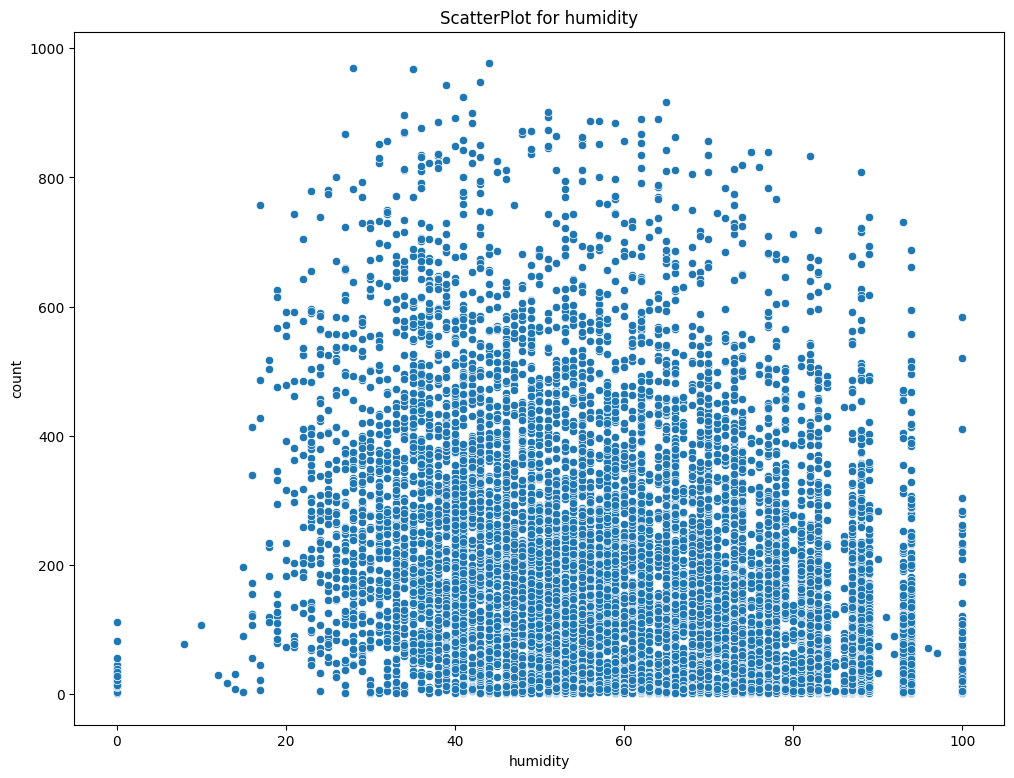

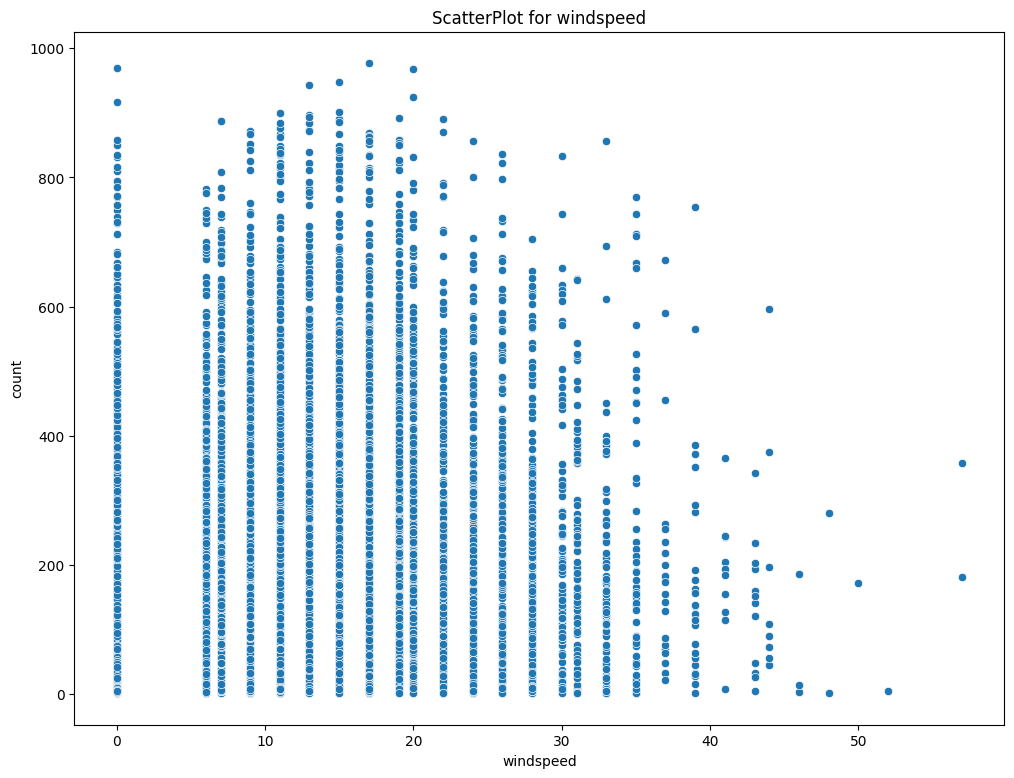

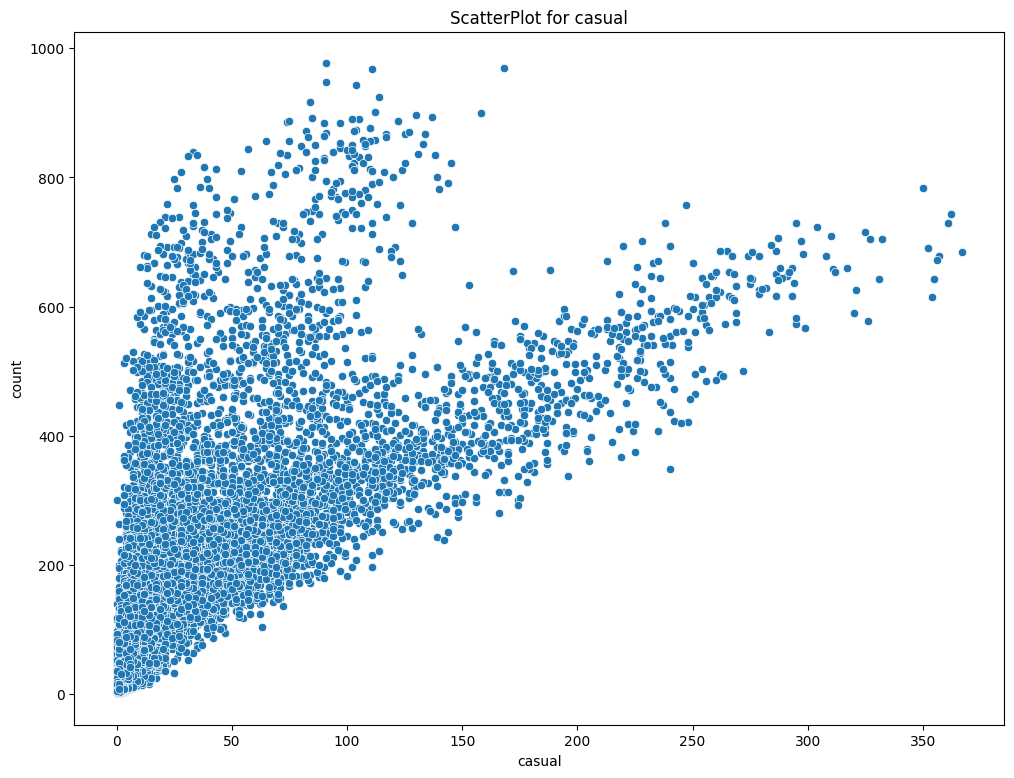

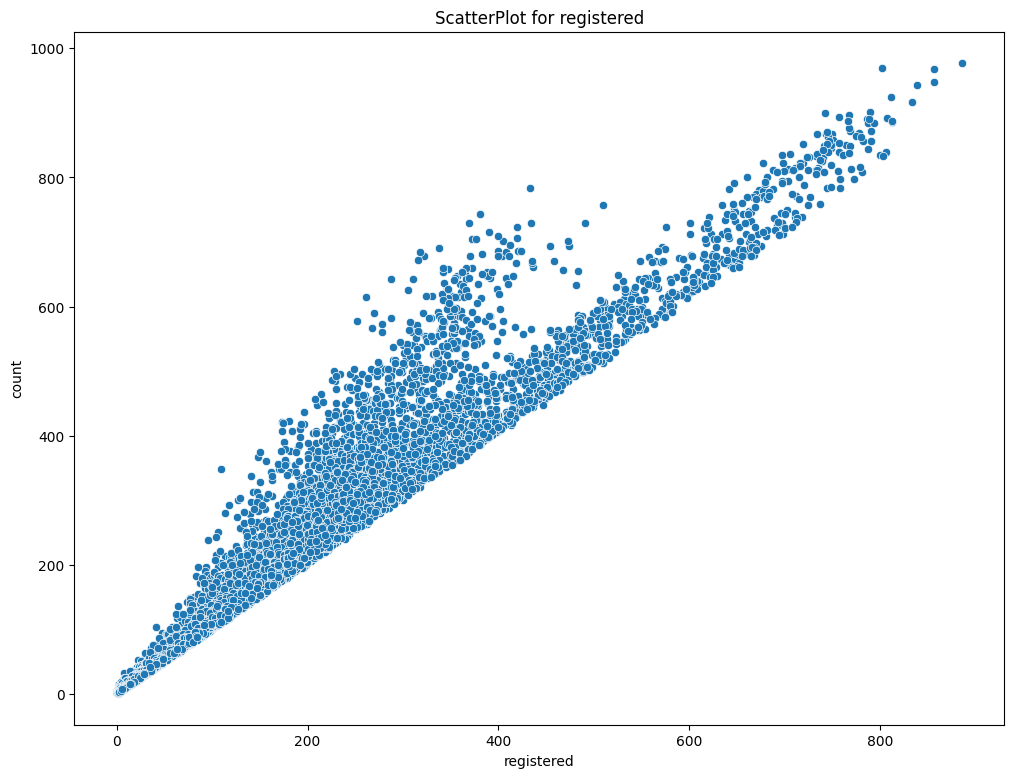

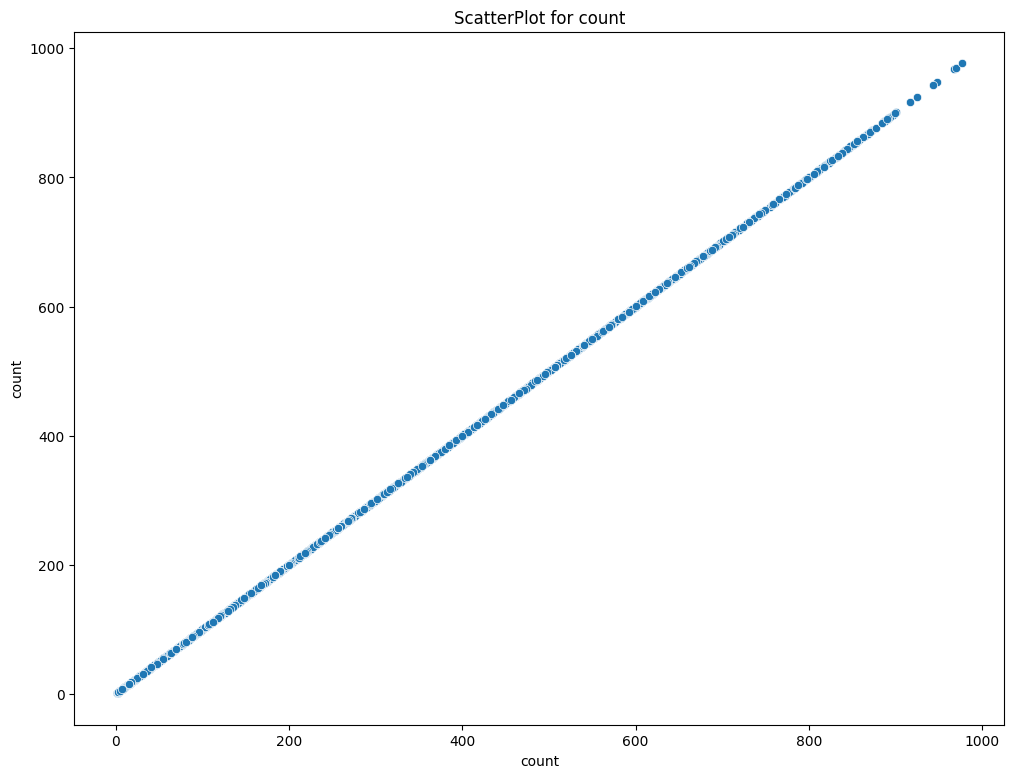

In [ ]:

for col in non_string_attributes:
  plt.figure(figsize=(12,9))
  sns.scatterplot(data=df,x=col,y='count')
  plt.title(f'ScatterPlot for {col}')
  plt.show()

 ---
Observations:

- When the humidity is less than 20, number of electric cycles rented is very very low.
- When the temperature is less than 10, number of electric cycles rented is less.
- When the windspeed is greater than 35, number of electric cycles rented is less.

<br>

<H3>Analyzing Correlations

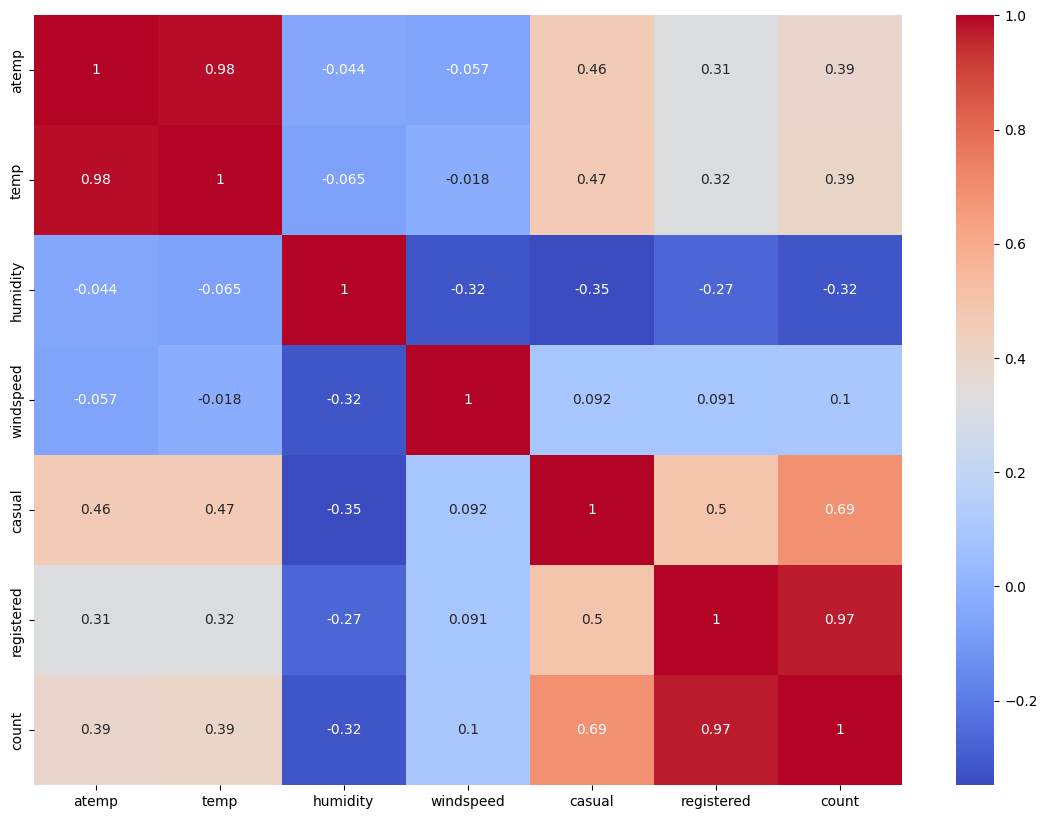

In [ ]:
corr = df[non_string_attributes].corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

---

Correlation Analysis:

- Atemp & Temp:
  - Strong positive correlation with each other (0.98), indicating a close relationship.
  - Both have moderate positive correlation with registered (0.31) and casual (0.46).
  - Both show positive correlation with count (0.39), showing a relationship with overall electric cycle rentals.

- Humidity:
  - Moderate negative correlation with registered (-0.27), casual (-0.35), and count (-0.32).
  - Weak negative correlation with atemp (-0.044) and temp (-0.065).
  - Suggests a inclination for fewer electric cycle rentals during higher humidity.

- WindSpeed:
  - Weak negative correlation with atemp (-0.057) and temp (-0.018).
  - Weak positive correlation with casual (0.092), registered (0.091), and count (0.10).
  - Indicates a subtle influence on electric cycle rentals with increasing wind speed.

- Registered:
  - Negative correlation with humidity (-0.27) and positive correlation with windspeed (0.091).
  - Positive correlation with atemp (0.31) and temp (0.32).
  - Highly correlated with casual (0.50) and count (0.97), drawing a substantial impact on overall rentals.

- Casual:
  - Moderate negative correlation with humidity (-0.35) and positive correlation with windspeed (0.092).
  - Strong positive correlation with atemp (0.46) and temp (0.47).
  - Highly correlated with registered (0.50) and count (0.69), suggesting a huge impact on overall rentals.

- Count:
  - Negative correlation with humidity (-0.32).
  - Positive correlation with atemp (0.39), temp (0.39), and casual (0.69).
  - Highly correlated with registered (0.97), drawing the joint impact of casual and registered rentals on the overall count.

  <br>

## Hypothesis Testing

<H3>Effect of working day on number of electric cycles rented

Setting up the Hypotheses:

  - Ho: Working Day has no effect on the number of electric cycles rented

  - H1: Working Day has effect on the number of electric cycles rented

  - Test Statistic: Two Sample T-test

  - Significance Level(α): 0.05 or 5%

In [ ]:
working_day_count =np.array(df[df['workingday']=='yes']['count'])
non_working_day_count =np.array(df[df['workingday']=='no']['count'])

stats.ttest_ind(working_day_count,non_working_day_count,equal_var=True)

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

---

- Since, pvalue is greater than significance level (0.22644804226361348 > 0.05) , we fail to reject the null hypothesis, working day has no effect on the number of electric cycles rented.
- At 95% confidence level, the mean of number of riders on non-working day is
statistically not different from the mean number of riders on working day.

<br>

<H3>No. of cycles rented similar or different in different seasons

Setting up the Hypotheses:
  - Ho: Season has no effect on the number of electric cycles rented

  - H1: Season has effect on the number of electric cycles rented

  - Test Statistic: One Way ANOVA

  - Significance Level(α): 0.05 or 5%

In [ ]:
spring_cycles = np.array(df[df['season'] == 'spring']['count'])
summer_cycles = np.array(df[df['season'] == 'summer']['count'])
fall_cycles = np.array(df[df['season'] == 'fall']['count'])
winter_cycles = np.array(df[df['season'] == 'winter']['count'])

stats.f_oneway(spring_cycles,summer_cycles,fall_cycles,winter_cycles)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

---

- Since, pvalue is lesser than significance level (6.164843386499654e-149 < 0.05), we reject the null hypothesis, season has no effect on the number of electric cycles rented.
- At 95% confidence level, the mean of number of riders in different seasons is
statistically different for atleast one season.

<br>

<H3>No. of cycles rented similar or different in different weather

Setting up the Hypotheses:
  - Ho: Weather has no effect on the number of electric cycles rented

  - H1: Weather has effect on the number of electric cycles rented

  - Test Statistic: One Way ANOVA

  - Significance Level(α): 0.05 or 5%

In [ ]:
clear_cycles = np.array(df[df['weather'] == 'clear']['count'])
mist_cycles = np.array(df[df['weather'] == 'mist']['count'])
light_rain_cycles = np.array(df[df['weather'] == 'light_rain']['count'])
heavy_rain_cycles = np.array(df[df['weather'] == 'heavy_rain']['count'])

stats.f_oneway(clear_cycles,mist_cycles,light_rain_cycles,heavy_rain_cycles)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

---

- Since, pvalue is lesser than significance level (5.482069475935669e-42 < 0.05), we reject the null hypothesis, weather has no effect on the number of electric cycles rented.
- At 95% confidence level, the mean of number of riders in different weather is
statistically different for atleast one weather.

<br>

<H3>Weather is dependent on season

Setting up the Hypoptheses:

  - Ho: Weather is independent of season

  - H1: Weather is dependent on season

  - Test Statistic: Chi-Square Test of Independence

  - Significance Level(α): 0.05 or 5%

In [ ]:
cont_table = pd.crosstab(df['season'],df['weather'])
cont_table

weather,clear,mist,light_rain,heavy_rain
season,,,,
spring,1759,715,211,1
summer,1801,708,224,0
fall,1930,604,199,0
winter,1702,807,225,0


In [ ]:
stats.chi2_contingency(cont_table)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

---

- Since, pvalue is lesser than significance level (1.549925073686492e-07 < 0.05), we reject the null hypothesis, weather is independent of season.

- At 95% confidence level, weather is dependent on seasons.

<br>

## Inferences

---

<H3>Insights:

- During holidays more electric cycles are rented.

- When humidity is less than 20, number of eletric cycles rented is low.

- Fall and summer have the highest number of electric cycles rented.

- When the windspeed is greater than 35, number of electric cycles rented is less.

- Whenever the weather was getting misty and rainy there was a drop in rental.

- When temperature is less than 10, number of electric cycles rented is low.

<br>

---

<H3>Recommendations:

- Enhancing the User Experience by investing in technology and infrastructure, including app features, bike maintenance, and customer support, fostering loyalty and repeat business.

- Yulu should stock more electric cycles during fall and summer as these two seasons have higher demands for rentals. As seen by the ANOVA test number of riders is dependent on season.

- Yulu can make rentals available according to the weather to make sure customers can rent electric cycles when needed and the company can also save on costs. As seen by the ANOVA test number of riders is dependent on weather.

- Company should start making some models which are sustainable during mist and light rain weather to increase rental sales even more.

- Promotional offers should be given during different seasons and weather to engage more customers.

- Yulu should further investigate based on rider's age and gender, as it would help further in determining which category of customers prefer renting electric cycles.

<br>